In [42]:
import matplotlib.pyplot as plt
# import plotly.plotly as py
# from load_jsons import *
import collections
import glob
import json


In [43]:
posts_TH = 100  # Will discard users having more than this publications, they are probably spam
createBlacklist = True

In [44]:
city = 'izmir'
json_base_path = '/home/emotionlex/Documents/newest/instaturkeydata/JSONS/unfiltered/'+city+'_jsons'
users_black_list_output_file_dir = '/home/emotionlex/Documents/newest/instaturkeydata/'+city+'_blacklisted_users.txt'

In [45]:
def load(path):
    data = {}
    print ("Loading data")
    c = 0
    for file in glob.glob(path+ "/*.json"):
        c += 1
        if c % 50000 == 0:
            print (c)
        with open(file) as data_file:
            try:
                data[file.split('/')[-1][:-5]] = json.load(data_file)
            except:
                print ("Failed decoding JSON, skipping")
                continue
    return data

In [46]:

data = load(json_base_path)
print ("Number of "+city+" jsons: " + str(len(data)))

Loading data
50000
Number of izmir jsons: 59676


In [47]:
# Plot num of publications of top  users
users = {}
for k, v in data.items():
     
    if v['owner']['id'] not in users:
        users[v['owner']['id']] = 1
    else:
        users[v['owner']['id']] = users[v['owner']['id']] + 1

In [48]:
print ("Number of authors: " + str(len(users)))
print ("User with max publications has:  " + str(max(users.values())))

Number of authors: 22154
User with max publications has:  242


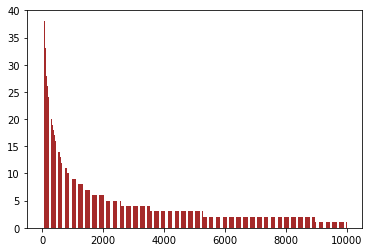

In [49]:
topX = 10000
user_publis_sorted = sorted(users.values(),reverse=True)
# sorted(user_publis_sorted, reverse=True)
# print(user_publis_sorted)
# user_publis_sortedsort(reverse=True)
x = range(topX)
width = 1/1.5
plt.ylim([0,40])
plt.bar(x, user_publis_sorted[0:topX], width, color="brown")
# plt.title("Number of posts of top" + str(topX) + "authors")
plt.show()

In [50]:

if createBlacklist:
    # Create a blacklist of users: That will be users having more than X publications (100)
    print ("Creating users black list")
    
    blacklisted = 0
    for user, num in users.items():
        if num > posts_TH:
            blacklisted += 1
            users_blacklist = open(users_black_list_output_file_dir,"a")
            users_blacklist.write(str(user) + '\n')
            users_blacklist.close()        
    print ("Num of blacklisted "+city+" users: " + str(blacklisted))

Creating users black list
Num of blacklisted izmir users: 10


In [51]:
# Plot num of likes
# likes_tens = {}
# likes_hundreds = {}
#
# for k, v in data.iteritems():
#     likes_ten = round(v['likes']['count'] / 10)
#     if likes_ten not in likes_tens:
#         likes_tens[likes_ten] = 1
#     else:
#         likes_tens[likes_ten] = likes_tens[likes_ten] + 1
#
#
# print "Number of different likes values (ten): " + str(len(likes_tens))
# print "Publication with max likes has (ten):  " + str(max(likes_tens.values()))
#
# topX = 10
#
# likes_tens_ordered = collections.OrderedDict(sorted(likes_tens.items()))
#
# if len(likes_tens_ordered.values()) < topX:
#     print "Not enought likes to print tens"
# else:
#     likes_publis_sorted = likes_tens_ordered.values()
#     likes_publis_sorted.sort(reverse=True)
#     my_xticks = ['0-5', '5-15', '15-25', '25-35','35-45', '45-55', '55-65', '75-85', '85-95','95-105']
#     x = range(topX)
#     plt.xticks(x, my_xticks)
#     width = 1/1.5
#     plt.bar(x, likes_publis_sorted[0:topX], width, color="blue")
#     plt.title("Likes of top posts (tens)")
#     plt.show()


In [52]:
print ("Done")

Done
